# Convolutional Neural Networks (CNN)

untuk Sistem Klasifikasi Jenis Ikan
Kuliah Kecerdasan Buatan

Pertama, import library yang dibutuhkan.

In [1]:
# Library yang dibutuhkan

import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np 
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from skimage.feature import hog
import glob
import time
import cv2
import os

%matplotlib inline

In [2]:
# Panggil Dataset (Data Latih)
# Urutan Data Ikan
# komet
# maanfish
# molly
# redfine
# zebra

dir_komet = "./Dataset/training-data/komet/*.jpg"
dir_maanfish = "./Dataset/training-data/maanfish/*.jpg"
dir_molly = "./Dataset/training-data/molly/*.jpg"
dir_redfine = "./Dataset/training-data/redfine/*.jpg"
dir_zebra = "./Dataset/training-data/zebra/*.jpg"

files = glob.glob(dir_komet)
komet = []
for f1 in files:
 img = cv2.imread(f1)
 komet.append(img)
    
files = glob.glob(dir_maanfish)
maanfish = []
for f1 in files:
 img = cv2.imread(f1)
 maanfish.append(img)
    
files = glob.glob(dir_molly)
molly = []
for f1 in files:
 img = cv2.imread(f1)
 molly.append(img)
    
files = glob.glob(dir_redfine)
redfine = []
for f1 in files:
 img = cv2.imread(f1)
 redfine.append(img)
    
files = glob.glob(dir_zebra)
zebra = []
for f1 in files:
 img = cv2.imread(f1)
 zebra.append(img)

# Panggil Dataset (Data Uji)
dir_komet_uji = "./Dataset/testing-data/komet/*.jpg"
dir_maanfish_uji = "./Dataset/testing-data/maanfish/*.jpg"
dir_molly_uji = "./Dataset/testing-data/molly/*.jpg"
dir_redfine_uji = "./Dataset/testing-data/redfine/*.jpg"
dir_zebra_uji = "./Dataset/testing-data/zebra/*.jpg"
files = glob.glob(dir_komet_uji)
komet_uji = []
for f1 in files:
 img = cv2.imread(f1)
 komet_uji.append(img) 

files = glob.glob(dir_maanfish_uji)
maanfish_uji = []
for f1 in files:
 img = cv2.imread(f1)
 maanfish_uji.append(img)
    
files = glob.glob(dir_molly_uji)
molly_uji = []
for f1 in files:
 img = cv2.imread(f1)
 molly_uji.append(img)
    
files = glob.glob(dir_redfine_uji)
redfine_uji = []
for f1 in files:
 img = cv2.imread(f1)
 redfine_uji.append(img)
    
files = glob.glob(dir_zebra_uji)
zebra_uji = []
for f1 in files:
 img = cv2.imread(f1)
 zebra_uji.append(img) 

In [3]:
# Cek ukuran Data latih
[np.shape(komet), np.shape(maanfish), np.shape(molly), np.shape(redfine), np.shape(zebra)]

[(5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3),
 (5, 300, 400, 3)]

In [4]:
# Cek ukuran Data Uji
[np.shape(komet_uji), np.shape(maanfish_uji), np.shape(molly_uji), np.shape(redfine_uji), np.shape(zebra_uji)]

[(2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3),
 (2, 300, 400, 3)]

In [5]:
# Data Latih semua jenis ikan digabung
X = np.vstack((komet, maanfish, molly, redfine, zebra)).astype(np.float32)

In [6]:
# Cek ukuran Data Latih setelah digabung
X.shape

(25, 300, 400, 3)

In [7]:
# Tampilkan sebelum dinormalisasi
print(X)

[[[[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  ...

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]

  [[ 13.  13.  13.]
   [234. 234. 234.]
   [254. 254. 254.]
   ...
   [255. 255. 255.]
   [255. 255. 255.]
   [255. 255. 255.]]]


 [[[255. 194. 119.]
   [254. 192. 122.]
   [222. 178. 125.]
   ...
   [219. 181. 117.]
   [247. 192. 119.]
   [254. 194. 118.]]

  [[238. 190. 118.]
   [161. 144. 105.]
   [ 55.  83.  94.]
   ...
   [ 61.  83.  65.]
 

In [8]:
# Data Latih semua jenis ikan Dinormalisasi
X = X / 255.0

In [9]:
X.shape

(25, 300, 400, 3)

In [10]:
len(komet)

5

In [11]:
# Tampilkan setelah dinormalisasi
print(X)

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[0.05098039 0.05098039 0.05098039]
   [0.91764706 0.91764706 0.91764706]
   [0.99607843 0.99607843 0.99607843]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[0.05098039 0.05098039 0.05098039]
   [0.9

In [12]:
# Data Uji semua jenis ikan digabung
X_uji = np.vstack((komet_uji, maanfish_uji, molly_uji, redfine_uji, zebra_uji))

In [13]:
# Cek ukuran Data Uji
X_uji.shape

(10, 300, 400, 3)

In [14]:
# Data Uji sebelum dinormalisasi
print(X_uji)

[[[[ 22  98  26]
   [ 35 118  43]
   [ 47 140  59]
   ...
   [ 13  20   7]
   [ 16  23  10]
   [ 19  26  13]]

  [[  4  72   1]
   [ 12  87  13]
   [ 20 107  27]
   ...
   [ 11  18   5]
   [ 13  20   7]
   [ 15  22   9]]

  [[ 15  69   0]
   [ 12  73   0]
   [ 10  80   3]
   ...
   [  7  14   1]
   [  9  16   3]
   [ 11  18   5]]

  ...

  [[ 40  55  51]
   [ 46  61  57]
   [ 70  86  79]
   ...
   [  0  11   5]
   [  0   4   1]
   [  0   7   4]]

  [[  5  22  18]
   [ 17  34  30]
   [ 55  73  66]
   ...
   [  0  10   4]
   [  0   4   1]
   [  3   8   7]]

  [[  1  18  14]
   [ 20  38  31]
   [ 48  66  59]
   ...
   [  0   9   3]
   [  0   2   0]
   [  6   8   8]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [15]:
# Data Uji semua jenis ikan Dinormalisasi
X_uji = X_uji / 255.0

In [16]:
# Cek setelah dinormalisasi
print(X_uji)

[[[[0.08627451 0.38431373 0.10196078]
   [0.1372549  0.4627451  0.16862745]
   [0.18431373 0.54901961 0.23137255]
   ...
   [0.05098039 0.07843137 0.02745098]
   [0.0627451  0.09019608 0.03921569]
   [0.0745098  0.10196078 0.05098039]]

  [[0.01568627 0.28235294 0.00392157]
   [0.04705882 0.34117647 0.05098039]
   [0.07843137 0.41960784 0.10588235]
   ...
   [0.04313725 0.07058824 0.01960784]
   [0.05098039 0.07843137 0.02745098]
   [0.05882353 0.08627451 0.03529412]]

  [[0.05882353 0.27058824 0.        ]
   [0.04705882 0.28627451 0.        ]
   [0.03921569 0.31372549 0.01176471]
   ...
   [0.02745098 0.05490196 0.00392157]
   [0.03529412 0.0627451  0.01176471]
   [0.04313725 0.07058824 0.01960784]]

  ...

  [[0.15686275 0.21568627 0.2       ]
   [0.18039216 0.23921569 0.22352941]
   [0.2745098  0.3372549  0.30980392]
   ...
   [0.         0.04313725 0.01960784]
   [0.         0.01568627 0.00392157]
   [0.         0.02745098 0.01568627]]

  [[0.01960784 0.08627451 0.07058824]
   [0.0

In [17]:
# Label ikan Data Latih
label_komet = np.array([0, 0, 0, 0, 0])
label_maanfish = np.array([1, 1, 1, 1, 1])
label_molly = np.array([2, 2, 2, 2, 2])
label_redfine = np.array([3, 3, 3, 3, 3])
label_zebra = np.array([4, 4, 4, 4, 4])

In [18]:
# Cek ukuran label Data Latih
[np.shape(label_komet), np.shape(label_maanfish), np.shape(label_molly), np.shape(label_redfine), np.shape(label_zebra)]

[(5,), (5,), (5,), (5,), (5,)]

In [19]:
# Semua Label Ikan Data Latih digabung
y = np.hstack((label_komet, label_maanfish, label_molly, label_redfine, label_zebra))

In [20]:
# Cek ukuran label ikan Data Latih
y.shape

(25,)

In [21]:
# Label ikan Data Uji
label_komet_uji = np.array([0, 0])
label_maanfish_uji = np.array([1, 1])
label_molly_uji = np.array([2, 2])
label_redfine_uji = np.array([3, 3])
label_zebra_uji = np.array([4, 4])

In [22]:
# Cek ukuran label Data Uji
[np.shape(label_komet_uji), np.shape(label_maanfish_uji), np.shape(label_molly_uji), np.shape(label_redfine_uji), np.shape(label_zebra_uji)]

[(2,), (2,), (2,), (2,), (2,)]

In [23]:
# Semua Label Ikan Data Uji digabung
y_uji = np.hstack((label_komet_uji, label_maanfish_uji, label_molly_uji, label_redfine_uji, label_zebra_uji))

In [24]:
# Cek ukuran label ikan Data Uji
y_uji.shape

(10,)

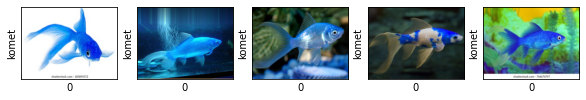

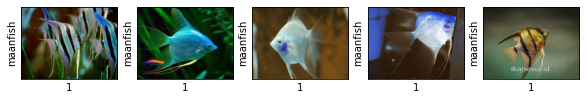

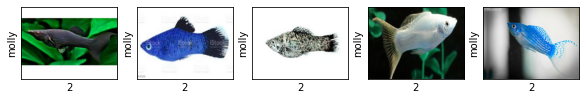

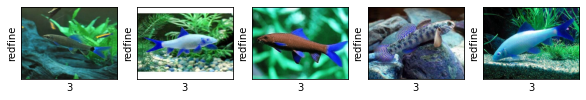

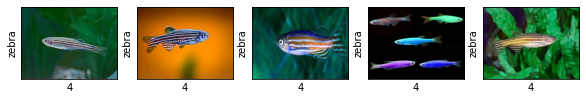

In [25]:
# Tampilkan sampel Data Latih
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(1,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet[i])
 plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(2,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish[i])
 plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(3,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly[i])
 plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(4,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine[i])
 plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(5):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra[i])
 plt.ylabel(class_names[4])
plt.show()

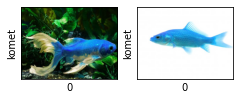

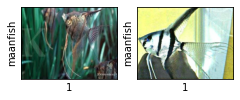

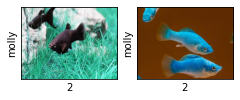

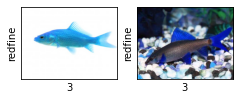

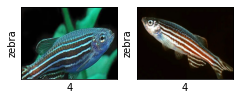

In [26]:
# Tampilkan sampel Data Uji
class_names = ['komet', 'maanfish','molly','redfine','zebra']
plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(1,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(komet_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_komet_uji[i])
 plt.ylabel(class_names[0])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(2,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(maanfish_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_maanfish_uji[i])
 plt.ylabel(class_names[1])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(3,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(molly_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_molly_uji[i])
 plt.ylabel(class_names[2])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(4,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(redfine_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_redfine_uji[i])
 plt.ylabel(class_names[3])
plt.show()

plt.figure(figsize=(10,10))
for i in range(2):
 plt.subplot(5,5,i+1)
 plt.xticks([])
 plt.yticks([])
 plt.grid(False)
 plt.imshow(zebra_uji[i], cmap=plt.cm.binary)
 plt.xlabel(label_zebra_uji[i])
 plt.ylabel(class_names[4])
plt.show()

Buat basis konvolusional 10 baris kode di bawah ini mendefinisikan dasar convolutional
menggunakan pola umum: setumpuk Conv2D dan MaxPooling2D lapisan.


Sebagai masukan, CNN mengambil bentuk tensor (tinggi_gambar, lebar_gambar, saluran_warna),
mengabaikan ukuran tumpukan. Color_channels merujuk ke (R, G, B). CNN untuk memproses
masukan dalam bentuk (100, 100, 3), sesuai Data Latih yang digunakan. Dapat dilakukan dengan
meneruskan argumen input_shape ke lapisan pertama kita.

In [27]:
model = models.Sequential()
model.add(layers.Conv2D(100, (3, 3), activation='relu', input_shape=(300, 400, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(200, (3, 3), activation='relu'))

Mari kita tampilkan arsitektur model kita sejauh ini.

In [28]:
# Menampilkan arsitektur model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 398, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 199, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 197, 200)     180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 98, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 96, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 48, 200)      0

Di atas, dapat dilihat bahwa output dari setiap lapisan Conv2D dan MaxPooling2D adalah bentuk
tensor 3D (tinggi, lebar, saluran). Dimensi lebar dan tinggi cenderung menyusut saat Anda masuk
lebih dalam di jaringan. Biasanya, saat lebar dan tinggi menyusut, Anda dapat (secara komputasi)
untuk menambahkan lebih banyak saluran keluaran di setiap lapisan Konv2D.

Tambahkan lapisan padat di atas untuk melengkapi model kita. Dapat dimasukkan tensor keluaran
terakhir dari basis konvolusional (berbentuk (2, 2, 200)) ke dalam satu atau lebih lapisan Padat
untuk melakukan klasifikasi. Lapisan padat mengambil vektor sebagai masukan (yaitu 1D),sedangkan keluaran saat ini adalah tensor 3D. Pertama, Anda akan meratakan (atau membuka
gulungan) keluaran 3D ke 1D, lalu menambahkan satu atau lebih lapisan Padat di atasnya. Sitem
memiliki 5 kelas keluaran, jadi digunakan lapisan Dense akhir dengan 5 keluaran.

In [29]:
model.add(layers.Flatten())
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(5))

Berikut arsitektur lengkap model kami.

In [30]:
# menampilkan arsitektur lengkap model CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 398, 100)     2800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 199, 100)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 197, 200)     180200    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 98, 200)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 96, 200)       360200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 48, 200)      0

Seperti yang Anda lihat, keluaran (2, 2, 200) kita diratakan menjadi vektor bentuk (800) sebelum
melewati dua layer Dense.

Kumpulkan dan latih modelnya

In [39]:
# Kumpulkan dan latih modelnya
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, y, epochs=10,
                    validation_data=(X_uji, y_uji))

Epoch 1/10
1/1 [==============================] - 150s 150s/step - loss: 1.4188 - accuracy: 0.2800 - val_loss: 10.3278 - val_accuracy: 0.2000
Epoch 2/10
1/1 [==============================] - 142s 142s/step - loss: 8.1568 - accuracy: 0.2000 - val_loss: 2.2689 - val_accuracy: 0.2000
Epoch 3/10
1/1 [==============================] - 149s 149s/step - loss: 1.9391 - accuracy: 0.3600 - val_loss: 1.6418 - val_accuracy: 0.2000
Epoch 4/10
1/1 [==============================] - 204s 204s/step - loss: 1.5990 - accuracy: 0.3600 - val_loss: 1.6036 - val_accuracy: 0.2000
Epoch 5/10
1/1 [==============================] - 187s 187s/step - loss: 1.5934 - accuracy: 0.4800 - val_loss: 1.6012 - val_accuracy: 0.2000
Epoch 6/10
1/1 [==============================] - 113s 113s/step - loss: 1.5926 - accuracy: 0.4000 - val_loss: 1.5984 - val_accuracy: 0.2000
Epoch 7/10
1/1 [==============================] - 121s 121s/step - loss: 1.5794 - accuracy: 0.3600 - val_loss: 1.5952 - val_accuracy: 0.2000
Epoch 8/10
1

Tampilkan dalam bentuk grafik

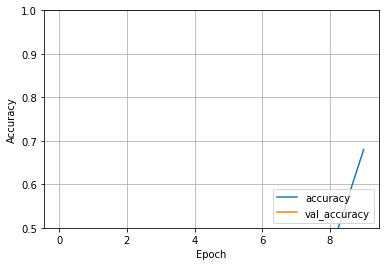

In [41]:
# Tampilkan grafik hasil pelatihan CNN dan validasi dengan Data Uji
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.grid()

In [42]:
# Evaluasi modelnya
test_loss, test_acc = model.evaluate(X_uji, y_uji, verbose=2)
# Tampilkan hasil tes akurasi
print('Hasil akurasi pengujian =',test_acc)

1/1 - 10s - loss: 1.6098 - accuracy: 0.3000 - 10s/epoch - 10s/step
Hasil akurasi pengujian = 0.30000001192092896


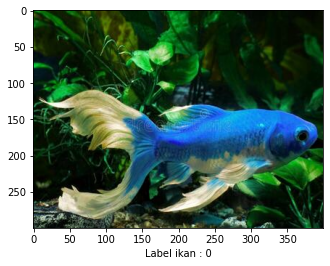

Hasil prediksi model: 4


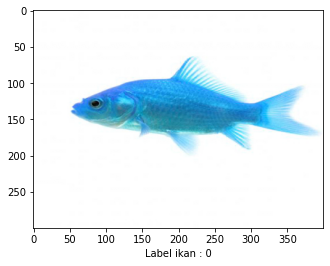

Hasil prediksi model: 2


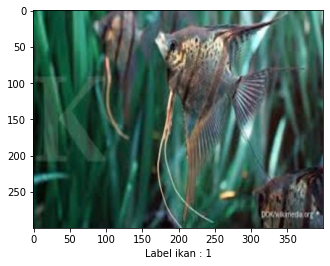

Hasil prediksi model: 2


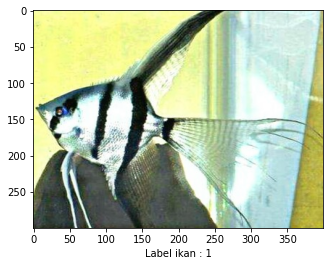

Hasil prediksi model: 2


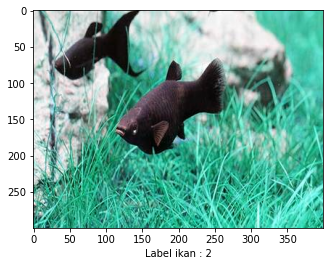

Hasil prediksi model: 2


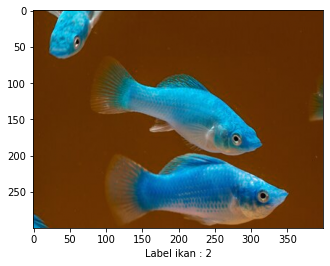

Hasil prediksi model: 4


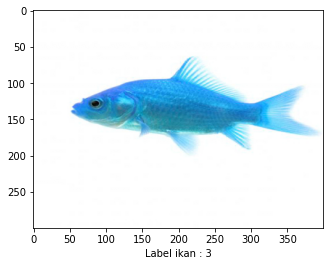

Hasil prediksi model: 2


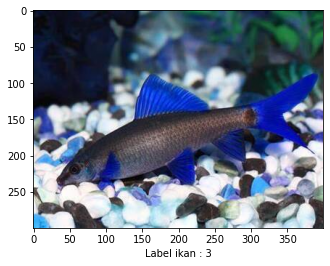

Hasil prediksi model: 3


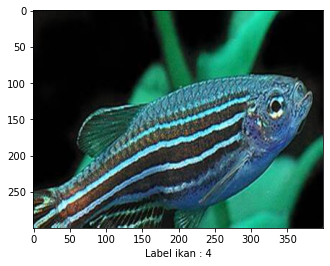

Hasil prediksi model: 0


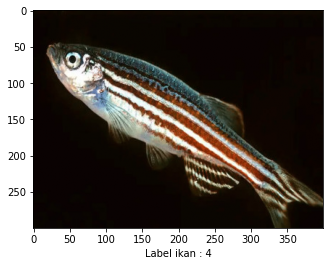

Hasil prediksi model: 4


In [43]:
# Visualisasikan hasil prediksi pengenalan ikan.
import matplotlib.pyplot as plt

# Memprediksi 10 gambar dari Data Uji.

n_images = 10
test_images = X_uji[:n_images]
test_label = y_uji[:n_images]
predictions = model.predict(test_images)

# Menampilkan gambar dan prediksi model.

for i in range(n_images):
 plt.imshow(test_images[i])
 plt.xlabel("Label ikan : %i" % test_label[i])
 plt.show()
 print("Hasil prediksi model: %i" % np.argmax(predictions[i]))